In [1]:
import tensorflow.keras.datasets as ds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data() # CIFAR-10: 자연영상 데이터셋
x_train = x_train.astype("float32")
x_train = x_train / 255 # [0,1]로 정규화
x_train = x_train[0:15,] # 앞 15개에 대해서만 증대 적용
y_train = y_train[0:15,] # 앞 15개에 대해서만 증대 적용
class_names=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

C:\Users\GreenTea\AppData\Local\Temp\ipykernel_14756\1393761477.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


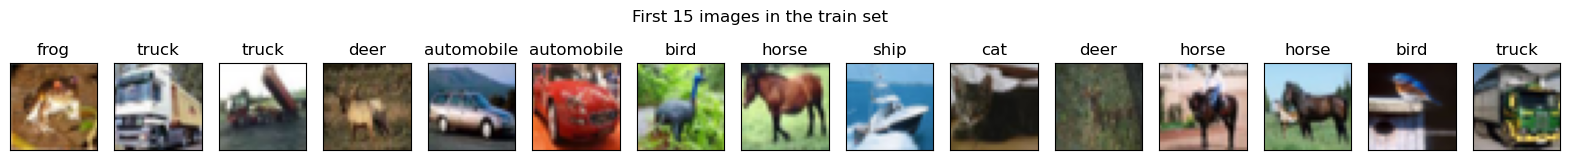

In [3]:
# 이미지 확인
plt.figure(figsize=(20,2))
plt.suptitle("First 15 images in the train set")
for i in range(15):
    plt.subplot(1,15,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[int(y_train[i])])
plt.show()

In [4]:
# 데이터 증강
batch_siz = 4 # 한 번에 생성하는 양(미니 배치)
generator = ImageDataGenerator(rotation_range=20.0, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
gen = generator.flow(x_train, y_train, batch_size=batch_siz)

C:\Users\GreenTea\AppData\Local\Temp\ipykernel_14756\2151626248.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(label[i])])


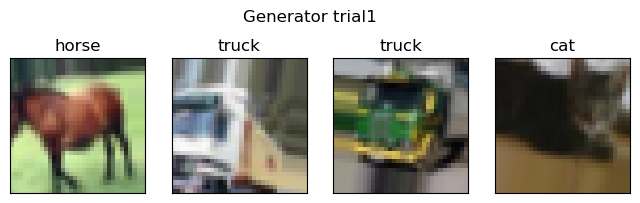

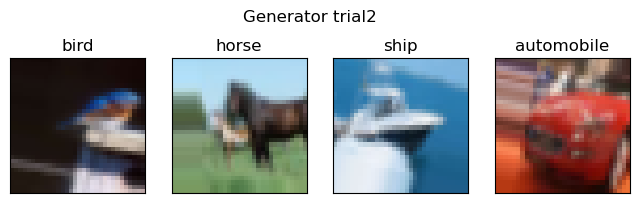

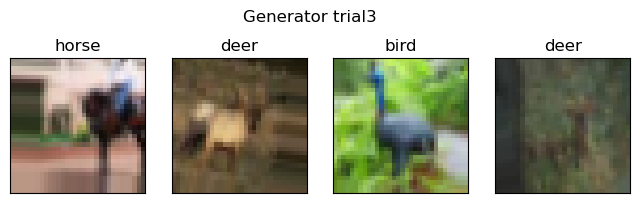

In [5]:
# 데이터 증강 확인
for a in range(3):
    img, label = gen[a] # 미니 배치만큼 생성
    plt.figure(figsize=(8,2.4))
    plt.suptitle("Generator trial"+str(a+1))
    for i in range(batch_siz):
        plt.subplot(1, batch_siz, i+1)
        plt.imshow(img[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(class_names[int(label[i])])
    plt.show()